# 1. Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.utils import save_model, load_model
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from jcopml.plot import plot_missing_value, plot_residual
from jcopml.automl import AutoRegressor

# 2. Import Dataset

**Coulumn Descriptions**
- country : the country in which the indicators are from (i.e. United States of America or Congo)
- year : the calendar year the indicators are from (ranging from 2000 to 2015)
- status = whether a country is considered to be 'Developing' or 'Developed' by WHO standards
- life_expectancy : the life expectancy of people in years for a particular country and year
- adult_mortality : the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per - 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way - to think of this is that the chance an individual will die between 15 and 60 is 26.3%

- infant_deaths : number of infant deaths per 1000 population; similar to above, but for infants

- alcohol : a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
- percentage_expenditure : expenditure on health as a percentage of Gross Domestic Product (gdp)
- hepatitis_b : number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
- measles = number of reported Measles cases per 1000 population
- bmi : average Body Mass Index (BMI) of a country's total population
- under-five_deaths : number of people under the age of five deaths per 1000 population
- polio : number of 1 year olds with Polio immunization over the number of all 1 year olds in population
- total_expenditure : government expenditure on health as a percentage of total government expenditure
- diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
- hiv/aids : deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to - HIV/AIDS per 1000 births
- gdp : Gross Domestic Product per capita
- populatio : population of a country
- thinness_1-19_years : rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-- 19_years to more accurately represent the variable)
- thinness_5-9_years : rate of thinness among people aged 5-9
- income_composition_of_resources : Human Development Index in terms of income composition of resources (index ranging - from 0 to 1)
- schooling = average number of years of schooling of a population

`This dataset use to predict life expectancy in many country.`

In [2]:
df = pd.read_csv("life_expectancy.csv")
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,...,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 2938 non-null   object 
 1   year                    2938 non-null   int64  
 2   status                  2938 non-null   object 
 3   life_expectancy         2928 non-null   float64
 4   adult_mortality         2928 non-null   float64
 5   infant_deaths           2938 non-null   int64  
 6   alcohol                 2744 non-null   float64
 7   percentage_expenditure  2938 non-null   float64
 8   HepB                    2385 non-null   float64
 9   measles                 2938 non-null   int64  
 10  BMI                     2904 non-null   float64
 11  u5_deaths               2938 non-null   int64  
 12  Polio                   2919 non-null   float64
 13  total_expenditure       2712 non-null   float64
 14  DPT                     2919 non-null   

In [5]:
#this way to display the hidden columns
pd.options.display.max_columns = 100

In [6]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data Description

In [25]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10-19_years,thinness_5-9_years,HDI,school_year
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [26]:
df.describe(include='O')

,country,status
count,2928,2928
unique,183,2
top,Vanuatu,Developing
freq,16,2416


### Rename several columns

In [27]:
df.rename(columns={'thinness_10_19': 'thinness_10-19_years'}, inplace= True)
df.rename(columns={'thinness_5_9': 'thinness_5-9_years'}, inplace = True)

df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10-19_years,thinness_5-9_years,HDI,school_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Plot the Missing Value

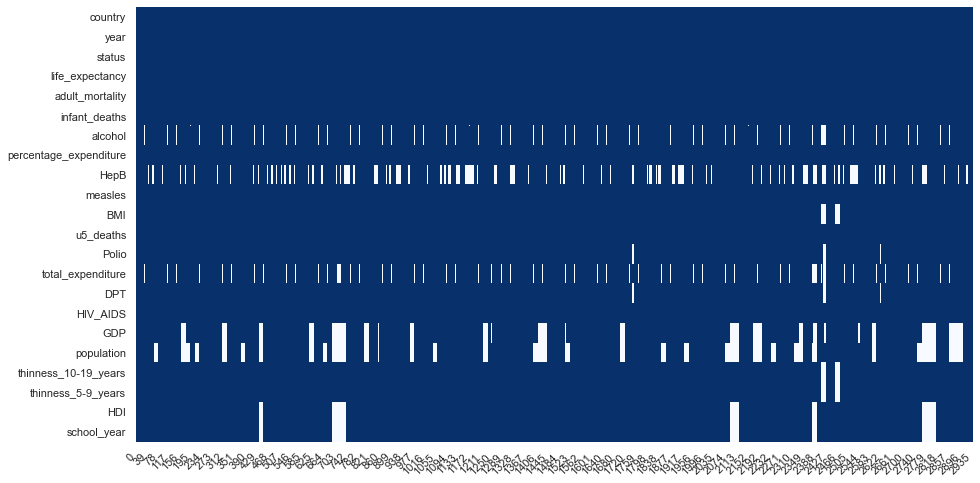

In [28]:
plot_missing_value(df)

In [29]:
df = df[~df.life_expectancy.isna()]

# Dataset Splitting

In [30]:
X = df.drop(columns="life_expectancy")
y = df.life_expectancy

# Modeling

In [31]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'HepB', 'measles',
       'BMI', 'u5_deaths', 'Polio', 'total_expenditure', 'DPT', 'HIV_AIDS',
       'GDP', 'population', 'thinness_10-19_years', 'thinness_5-9_years',
       'HDI', 'school_year'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 2928 non-null   object 
 1   year                    2928 non-null   int64  
 2   status                  2928 non-null   object 
 3   life_expectancy         2928 non-null   float64
 4   adult_mortality         2928 non-null   float64
 5   infant_deaths           2928 non-null   int64  
 6   alcohol                 2735 non-null   float64
 7   percentage_expenditure  2928 non-null   float64
 8   HepB                    2375 non-null   float64
 9   measles                 2928 non-null   int64  
 10  BMI                     2896 non-null   float64
 11  u5_deaths               2928 non-null   int64  
 12  Polio                   2909 non-null   float64
 13  total_expenditure       2702 non-null   float64
 14  DPT                     2909 non-null   

In [33]:
model = AutoRegressor(num_feature= ['year','adult_mortality','infant_deaths','alcohol','percentage_expenditure','HepB','measles','BMI',
                                    'u5_deaths','Polio','total_expenditure','DPT','HIV_AIDS','GDP','population','thinness_10-19_years','thinness_5-9_years','HDI','school_year'],
                     cat_feature= ['country','status'])
                        

In [34]:
model.fit(X, y, cv = 5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


================== Best Model Info ==================
algo                      | RandomForestRegressor
algo__max_depth           | 47
algo__max_features        | 0.7020316536967898
algo__min_samples_leaf    | 1
algo__n_estimators        | 168

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=False, strategy='mean')
numerical_scaler          | RobustScaler

=========== Score ===========
Train: 0.9945674403730264
Valid: 0.9615804780156717
Test : 0.969850646287245


# View Results

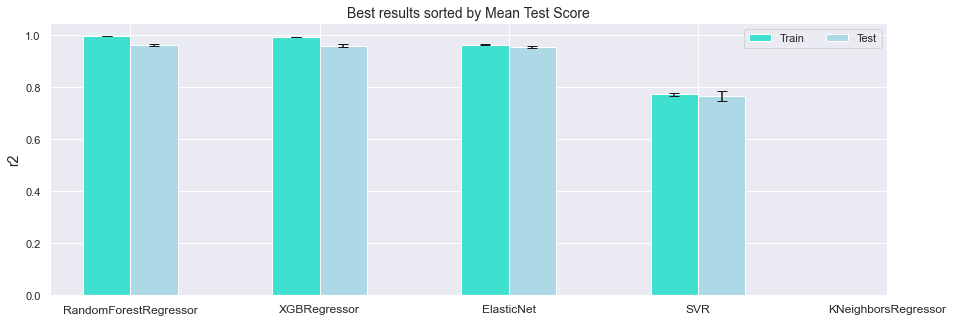

In [15]:
model.plot_results()

# Feature Importance

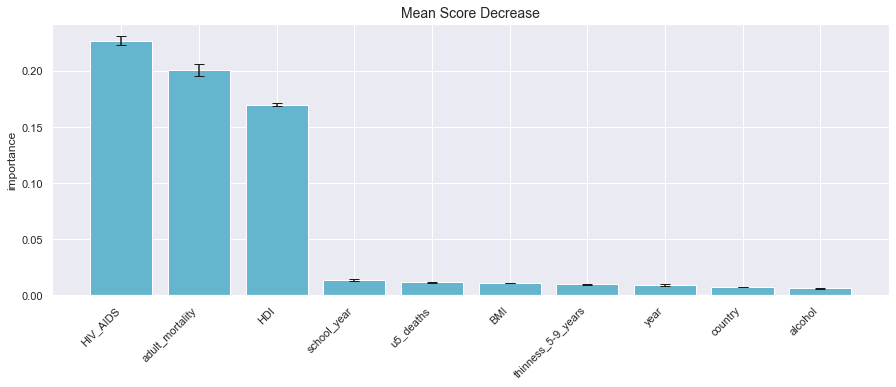

In [16]:
model.mean_score_decrease()

# Modeling

In [17]:
model = AutoRegressor(num_feature= ['HIV_AIDS', 'adult_mortality', 'HDI', 'school_year', 'u5_deaths', 'BMI', 'thinness_5-9_years',
                                   'alcohol','year'],
                      cat_feature= ['country'])

In [18]:
model.fit(X, y, cv = 5, algo = ['xgb'], n_trial= 150)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  2.5min finished


================== Best Model Info ==================
algo                      | XGBRegressor
algo__colsample_bytree    | 0.3678716570583799
algo__gamma               | 3
algo__learning_rate       | 0.060034839992196526
algo__max_depth           | 9
algo__n_estimators        | 118
algo__reg_alpha           | 0.0023181776112903493
algo__reg_lambda          | 0.018934530915191535
algo__subsample           | 0.7750309835254026

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=True, strategy='mean')

=========== Score ===========
Train: 0.9949605353802479
Valid: 0.9660157128416614
Test : 0.9699469303958144


## Polynomial Features

In [ ]:
model.fit(X, y, cv=5, algo=['xgb'], poly=True, n_trial= 150)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.3min


# Evaluation

In [20]:
from jcopml.plot import plot_residual

In [21]:
X_train = model.X_train
y_train = model.y_train
X_test = model.X_test
y_test = model.y_test

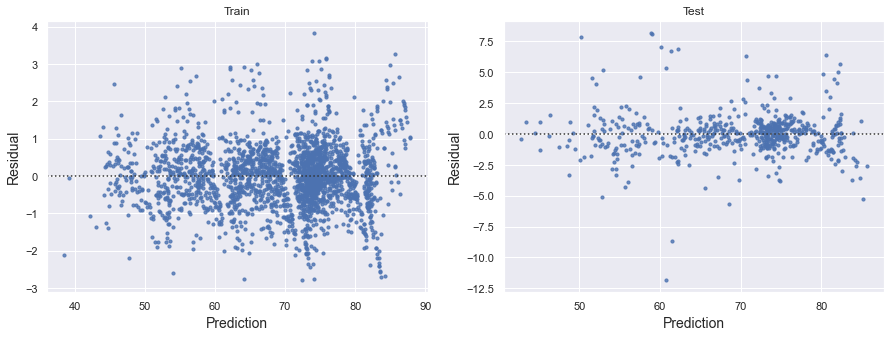

In [22]:
plot_residual(X_train, y_train, X_test, y_test, model.model)

## Error Checking

In [23]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error', ascending=False).head(10)

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10-19_years,thinness_5-9_years,HDI,school_year,pred,actual,error
2424,South Sudan,2000,Developing,38.0,31,NaN,0.000000,NaN,0,NaN,50,NaN,NaN,NaN,2.7,NaN,67656.0,NaN,NaN,0.000,0.0,60.789677,48.9,11.889677
433,Côte d'Ivoire,2014,Developing,47.0,58,0.01,0.000000,76.0,50,27.4,80,76.0,5.72,76.0,2.0,NaN,NaN,5.6,5.6,NaN,NaN,61.519047,52.8,8.719047
2922,Zimbabwe,2015,Developing,336.0,22,NaN,0.000000,87.0,0,31.8,32,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3,58.893986,67.0,8.106014
2779,United Republic of Tanzania,2014,Developing,34.0,86,0.01,0.000000,97.0,88,23.2,121,97.0,5.58,97.0,1.4,NaN,NaN,6.8,6.6,NaN,NaN,58.970913,67.0,8.029087
2790,United Republic of Tanzania,2003,Developing,459.0,103,2.34,0.000000,95.0,1673,17.2,160,97.0,4.60,95.0,11.5,NaN,NaN,7.9,7.9,NaN,NaN,50.266457,58.0,7.733543
2716,Uganda,2013,Developing,325.0,71,0.01,90.761444,78.0,7878,17.6,103,82.0,7.47,78.0,4.0,662.492293,37553726.0,5.7,5.7,0.478,10.0,60.071629,67.0,6.928371
1564,Madagascar,2005,Developing,265.0,37,0.72,33.747862,81.0,0,15.8,56,8.0,5.30,85.0,0.6,274.819723,18336724.0,8.1,8.0,0.473,8.9,62.201233,69.0,6.798767
963,Gambia,2014,Developing,266.0,3,0.01,0.000000,96.0,1,26.7,5,97.0,7.34,96.0,1.7,NaN,NaN,7.5,7.3,0.449,8.9,61.319904,68.0,6.680096
2322,Singapore,2006,Developed,66.0,0,1.55,2639.376955,95.0,23,3.5,0,95.0,3.66,95.0,0.1,33579.859480,NaN,2.1,2.0,0.839,13.9,80.615326,87.0,6.384674
1412,Kyrgyzstan,2013,Developing,174.0,3,0.01,0.000000,97.0,1,43.0,4,97.0,6.68,97.0,0.1,NaN,NaN,3.3,3.3,0.647,12.5,70.719307,77.0,6.280693


# Save Model

In [24]:
model.save(fname='life_expectancy_xgb_baseline.pkl')

Model is pickled as model/life_expectancy_xgb_baseline.pkl
